## Jupyter Placeholder with learn-env

### Problem:

- Microsoft want to create a new movie studio but have no idea about creating movies
- respondible to ecplore what types of films are currently doing the best at the box office
- turn analysis to actionable insights
- the results from that will help Microsoft's new movie studio decide what type of films to create.

### Data:

- main data to use: IMDB (sql data) - movie_basics and movie_ratings table
- bom.movie_gross.csv 

### Analysis:

- Your analysis should yield three concrete business recommendations.
- Communicating about your work well is extremely important.
- highlighting the most important points and skipping over the rest.
- Use plenty of visualizations.
-  three visualizations which correspond to three business recommendations.

### Measurements to consider in measuring a movie's success based on [article](https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879/)

- production cost
- box office gross
- marketing domestic/international
- rentals (the money the studio makes)
- distribution fee
- theatrical profit 
- international revenue



### Measurements available from data files

- domestic gross
- foreign gross


## Data understanding

### IMDB Database

* `movie_basics` : Table containing movies including original movie title, premiered movie title(primary title?), release year, length of the movie and the genre
* `persons` : Table containing the name of people in the theatre entertainment industry and their primary profession (actor, director etc.)
* `directors`: Table with movie ID and its correspongin director's ID
* `known_for`: Table containing the person's ID and the corresponding movie ID that the person is known for.
* `movie_akas`: Table containing movies and the title they are known as in different countries.
* `movie_ratings`: Table containing movie ID and their average rating and number of ratings they received on IMDB
* `principals`: Table containing movie ID and the corresponding person ID that is involved in the movie in some sort of capacity, specified in the category, jobs and character (if they are actors) columns.
* `writers` : Table containing movie ID and their corresponding writers' person ID

### bom.movie_gross.csv
* **Source** : This dataset comes from [Box office mojo](https://www.boxofficemojo.com/) - a website that tracks film revenue
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### rt.movie_info.tsv
* **Source** : This dataset comes from [Rotten Tomatoes](https://www.rottentomatoes.com/) - an "online aggregator of movie and TV show reviews from critics"
* **Contents** : Data about movies including their synopsis, rating, genre, director, writer, release data in theatre, release data on DVD, Box office rental profit, length of movie and studio of production.

### rt.reviews.tsv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tmdb.movies.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tn.movie_budgets.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year


Below we import the `sqlite3`, `pandas` and `numpy`, which will be used to for reading and exploring our data. We are also importing `seaborn` and `matplotlib` modules, which we will use for visualization.

In [1]:
#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
conn = sqlite3.connect('./zippedData/im.db')

In [100]:
imdb_schema = pd.read_sql("""

SELECT * from sqlite_master

""",conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
def read_sql_as_df(table_name, con):
    """
    Selects all columns in a database table and convert it into a Dataframe
    -
    Input:
    table_name = takes in a string of the table name to import
    con = variable that has the established database connection   
    -
    Output:
    DataFrame containing all columns of the database table.
    """
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

In [5]:
movie_akas_df = read_sql_as_df('movie_akas',conn)
movie_akas_df.head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [6]:
movie_ratings_df = read_sql_as_df('movie_ratings',conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
directors_df = read_sql_as_df('directors',conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [8]:
writers_df = read_sql_as_df('writers',conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [9]:
movie_basics_df = read_sql_as_df('movie_basics',conn)
movie_basics_df.tail(10)
# movie_basics.columns

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [10]:
persons_df = read_sql_as_df('persons',conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [11]:
len(persons_df['primary_name'].unique())

577203

In [12]:
known_for_df = read_sql_as_df("known_for",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [150]:
principals_df = read_sql_as_df("principals",conn)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


### Non database data

In [14]:
movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
movie_info_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [15]:
len(movie_info_df['director'].unique())

1126

In [16]:
movie_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', delimiter = '\t',encoding = 'unicode_escape')
movie_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Start of preliminary Data exploratory

In [19]:
#Join the table movie_basics and movie_ratings to start exploring popularity and average reviews by genre.


movie_basics_reviews = pd.read_sql("""
SELECT mb.movie_id, mb.primary_title ,mb.start_year,mb.runtime_minutes, mb.genres
        ,r.averagerating, r.numvotes
        
FROM movie_basics as mb
INNER JOIN movie_ratings as r
        ON mb.movie_id = r.movie_id

""",conn)
movie_basics_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [20]:
movie_basics_reviews.isna().sum() #checkout null values in our new table

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [21]:
movie_basics_reviews_cleaned = movie_basics_reviews.dropna(subset =['genres']) #drop rows with null values in the genre column

In [22]:
#Reset the table index after dropping the null rows
movie_basics_reviews_cleaned=movie_basics_reviews_cleaned.reset_index(drop=True)



In [23]:
#List of common film genres

genre_list=["Action","Comedy","Drama","Fantasy","Horror","Mystery","Romance","Thriller","Western","Sci-Fi","Animation"
            ,"Documentary","Biography","Crime","Musical","History","Family"]

In [24]:
#Make a new column for each genre with boolean values. True if genre is one of the movie's genre list.

for genre in genre_list:
    movie_basics_reviews_cleaned[genre]=[True if genre in movie else False for movie in movie_basics_reviews_cleaned['genres'] ]

In [143]:
#Create genre popularity dict with genre name as keys and number of movies with that genre as values. The total values of all
#keys will be more than the total movies in the data because some movies are considered as multiple genres.

genre_popularity = { genre: movie_basics_reviews_cleaned[genre].sum() for genre in genre_list}
genre_popularity = dict(sorted(genre_popularity.items(),key=lambda item: item[1]))
genre_popularity

{'Western': 280,
 'Musical': 721,
 'Animation': 1743,
 'Fantasy': 2126,
 'Sci-Fi': 2206,
 'History': 2825,
 'Mystery': 3039,
 'Family': 3412,
 'Biography': 3809,
 'Crime': 4611,
 'Romance': 6589,
 'Action': 6988,
 'Horror': 7674,
 'Thriller': 8217,
 'Comedy': 17290,
 'Documentary': 17753,
 'Drama': 30788}

In [139]:
pd.DataFrame.from_dict(genre_popularity.values()).describe()

,0
count,17.000000
mean,7063.000000
std,7946.144128
min,280.000000
25%,2206.000000
50%,3809.000000
75%,7674.000000
max,30788.000000


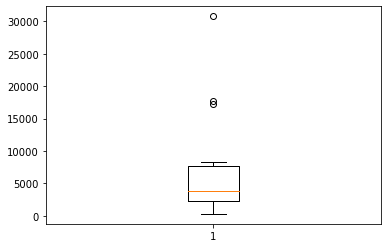

In [142]:

fig, ax = plt.subplots()

ax.boxplot(list(genre_popularity.values()))


plt.show()

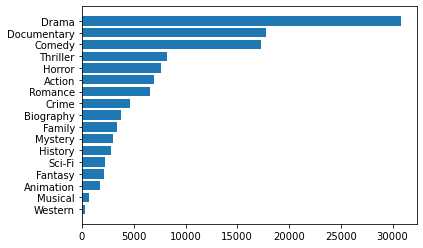

In [27]:
#Plot of Genre Popularity. 

fig, ax = plt.subplots()

ax.barh(list(genre_popularity.keys()),genre_popularity.values())


plt.show()

In [147]:
#Calculating average rating:

genre_rating ={}

for genre in genre_list: #loop through genre in the genre list defined prior
    n = 0 #number of movies 
    rating_sum = 0 #rating summation
    idx =0  #keep track of index
    for row in movie_basics_reviews_cleaned[genre]:
        if (row==True):
#             print(test['averagerating'][0])
            rating_sum += movie_basics_reviews_cleaned['averagerating'][idx]
            n+=1
        idx +=1
    genre_rating[genre] = rating_sum/n #rating summation divided by number of movies
    
genre_rating =dict(sorted(genre_rating.items(),key=lambda item: item[1]))

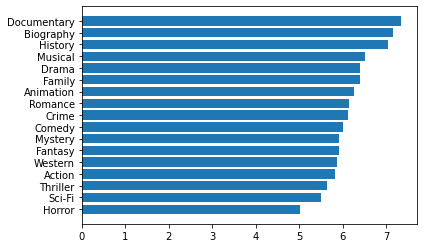

In [29]:
# Average rating by genre

fig, ax = plt.subplots()

ax.barh(list(genre_rating.keys()),genre_rating.values())


plt.show()

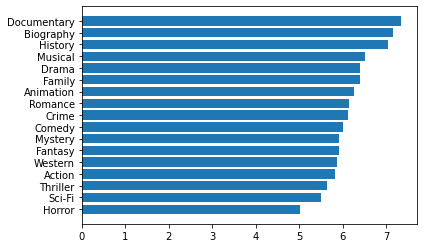

In [148]:
fig, ax = plt.subplots()

ax.barh(list(genre_rating.keys()),genre_rating.values())


plt.show()

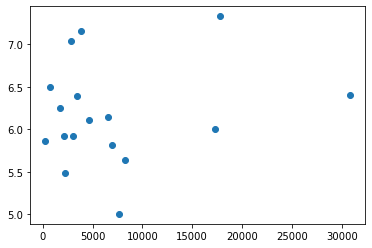

In [129]:
# Looking at correlation between average rating and number of reviews

fig, ax = plt.subplots()

ax.scatter(genre_popularity.values(),genre_rating.values())


plt.show()

In [31]:
movie_basics_reviews_cleaned.sort_values(by=['numvotes'], ascending = False)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Comedy,Drama,...,Thriller,Western,Sci-Fi,Animation,Documentary,Biography,Crime,Musical,History,Family
2374,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2228,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,True,False,False,...,True,False,False,False,False,False,False,False,False,False
275,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,False,False,True,...,False,False,True,False,False,False,False,False,False,False
11963,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,False,False,True,...,False,True,False,False,False,False,False,False,False,False
320,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35407,tt3417906,The Nose,2013,52.0,Documentary,8.6,5,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53547,tt5465608,Extramaterial,2016,59.0,Documentary,6.6,5,False,False,False,...,False,False,False,False,True,False,False,False,False,False
47390,tt4681636,Free Spaces,2015,60.0,Documentary,9.0,5,False,False,False,...,False,False,False,False,True,False,False,False,False,False
29744,tt2915328,Abou Al Oureef,2014,96.0,Comedy,5.2,5,False,True,False,...,False,False,False,False,False,False,False,False,False,False


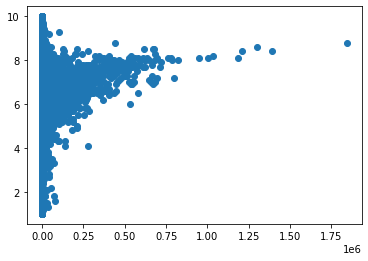

In [145]:
# Looking at correlation between average rating and number of reviews

fig, ax = plt.subplots()

ax.scatter(movie_basics_reviews_cleaned['numvotes'],movie_basics_reviews_cleaned['averagerating'])


plt.show()

## Explore how casts/directors/actors affects popularity and ROI

In [34]:
principals_mb = principals.merge(movie_basics_df,how = 'left',on ='movie_id')

In [39]:
principals_mb_persons = principals_mb.merge(persons_df,how ='left',on ='person_id')
principals_mb_persons.head(3)

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",A Thin Life,A Thin Life,2018,75.0,Comedy,Tommy Dysart,NaN,NaN,actor
1,tt0111414,2,nm0398271,director,None,None,A Thin Life,A Thin Life,2018,75.0,Comedy,Frank Howson,1952.0,NaN,"actor,writer,producer"
2,tt0111414,3,nm3739909,producer,producer,None,A Thin Life,A Thin Life,2018,75.0,Comedy,Barry Porter-Robinson,NaN,NaN,"producer,art_department"


In [42]:
principal_actors = principals_mb_persons[principals_mb_persons['category'] == "actor"]
principal_actors.head()

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",A Thin Life,A Thin Life,2018,75.0,Comedy,Tommy Dysart,NaN,NaN,actor
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",Henry Garrett,NaN,NaN,actor
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",Graham McTavish,1961.0,NaN,"actor,soundtrack,director"
14,tt0417610,1,nm0532721,actor,None,"[""Lucio""]",Asleep in the Sun,Dormir al sol,2010,83.0,Fantasy,Luis Machín,1968.0,NaN,"actor,cinematographer"
16,tt0417610,3,nm0069209,actor,None,"[""Dr. Samaniego""]",Asleep in the Sun,Dormir al sol,2010,83.0,Fantasy,Carlos Belloso,1963.0,NaN,"actor,soundtrack"


In [43]:
principal_actors.isna().sum()

movie_id                   0
ordering                   0
person_id                  0
category                   0
job                   256718
characters             52167
primary_title              0
original_title             0
start_year                 0
runtime_minutes        57325
genres                  6448
primary_name             157
birth_year            177477
death_year            253776
primary_profession     13973
dtype: int64

In [45]:
len(principal_actors['person_id'].unique())

157948

In [47]:
principal_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256718 entries, 0 to 1028181
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            256718 non-null  object 
 1   ordering            256718 non-null  int64  
 2   person_id           256718 non-null  object 
 3   category            256718 non-null  object 
 4   job                 0 non-null       object 
 5   characters          204551 non-null  object 
 6   primary_title       256718 non-null  object 
 7   original_title      256718 non-null  object 
 8   start_year          256718 non-null  int64  
 9   runtime_minutes     199393 non-null  float64
 10  genres              250270 non-null  object 
 11  primary_name        256561 non-null  object 
 12  birth_year          79241 non-null   float64
 13  death_year          2942 non-null    float64
 14  primary_profession  242745 non-null  object 
dtypes: float64(3), int64(2), object(1

In [49]:
principal_actors['primary_name'].value_counts()

Eric Roberts              147
Brahmanandam              126
Prakash Raj                79
Mihir Das                  71
Tom Sizemore               70
                         ... 
Udo Suzuki                  1
Jiten Mukhi                 1
Argiris Ottas               1
Chiquito de la Calzada      1
Cheuk-Yin Mui               1
Name: primary_name, Length: 153885, dtype: int64

In [104]:
actor_20 = list(principal_actors['primary_name'].value_counts()[principal_actors['primary_name'].value_counts() > 20].index)


In [87]:
#filter out actors who starred less than 20 movies

principal_actors_20 = principal_actors.groupby("primary_name").filter(lambda x: len(x) > 20) 
principal_actors_20.head(3)

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession
60,tt0780548,4,nm0000579,actor,None,"[""Barry Lerner""]",Kid Cannabis,Kid Cannabis,2014,110.0,"Biography,Comedy,Crime",Ron Perlman,1950.0,NaN,"actor,producer,soundtrack"
237,tt10163206,3,nm0324845,actor,None,None,Marathon Zindagi,Marathon Zindagi,2017,137.0,Drama,Vikram Gokhale,1940.0,NaN,"actor,director"
273,tt10178860,4,nm0348004,actor,None,"[""Samar Bandorkar""]",Miranda House,Miranda House,2019,NaN,Drama,Milind Gunaji,1961.0,NaN,actor


In [88]:
len(principal_actors_20)

11819

## Reboot movies - data exploration

In [89]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [90]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [92]:
diff_title = movie_basics_df[movie_basics_df['primary_title'] != movie_basics_df['original_title']]
diff_title

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
...,...,...,...,...,...,...
146026,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,2019,116.0,"Comedy,Drama"
146028,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,2019,NaN,"Adventure,Crime,Drama"
146037,tt9900688,Big Three Dragons,Da San Yuan,2019,111.0,Comedy
146121,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary


In [94]:
same_title = movie_basics_df[movie_basics_df['primary_title'] == movie_basics_df['original_title']]
same_title

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [96]:
len(movie_basics_df['primary_title'].unique())

136071

In [97]:
movie_basics_df.sample(n=10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
79318,tt4551112,Riz cantonais,Riz cantonais,2015,51.0,"Biography,Documentary,Family"
102849,tt6020564,The Dirty Thirty,The Dirty Thirty,2016,116.0,"Comedy,Drama"
20931,tt1866960,Ferrytale,Ferrytale,2011,19.0,"Biography,Documentary,History"
13340,tt1684629,Claudia,Claudia,2010,79.0,"Biography,Crime,Documentary"
9829,tt1577072,The Beast of Bottomless Lake,The Beast of Bottomless Lake,2010,105.0,"Adventure,Comedy,Fantasy"
82865,tt4779826,Flesh for the Inferno,Flesh for the Inferno,2015,85.0,Horror
70229,tt4014154,Tim & Leon,Tim & Leon,2014,74.0,"Comedy,Fantasy,Romance"
80813,tt4644978,A Morte Diária,A Morte Diária,2015,78.0,Documentary
114574,tt6779238,"O Jehovah, ... I Trust in You","O Jehovah, ... I Trust in You",2016,52.0,"Drama,History,War"
7045,tt1371585,Life Without Principle,Duet min gam,2011,107.0,"Crime,Drama"


In [124]:
movie_basics_df['start_year'].sort_values(ascending = True)

9599     2010
43264    2010
11550    2010
11551    2010
11552    2010
         ... 
2948     2024
52213    2025
2949     2026
96592    2027
89506    2115
Name: start_year, Length: 146144, dtype: int64

In [122]:
movie_basics_df['primary_title'].value_counts()[0:20]

Home             24
The Return       20
Broken           20
Alone            16
Homecoming       16
Gone             15
Freedom          14
Brothers         13
Together         13
Run              13
The Gift         13
The End          13
Macbeth          12
Retribution      12
Paradise         12
Hope             12
Lucky            11
Karma            11
The Journey      11
Forget Me Not    10
Name: primary_title, dtype: int64

In [102]:
movie_basics_df[movie_basics_df['primary_title'] == "Home"]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
27295,tt2075392,Home,Yurt,2011,76.0,Drama
27922,tt2089701,Home,Home,2011,7.0,"Documentary,Drama,Family"
28069,tt2093100,Home,Dom,2011,127.0,Drama
32554,tt2224026,Home,Home,2015,94.0,"Adventure,Animation,Comedy"
38079,tt2372760,Home,Hemma,2013,90.0,"Drama,Romance"
38947,tt2393825,Home,Home,2013,112.0,Drama
42535,tt2545384,Home,Home,2016,87.0,"Drama,Horror,Thriller"
44656,tt2650038,Home,Home,2012,3.0,"Biography,Documentary"
47561,tt2821866,Home,Home,2013,92.0,Drama
56247,tt3289416,Home,Dom tsah,2012,26.0,"Documentary,History"


In [105]:
movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [110]:
movie_info_df['studio'].value_counts()[0:20]

Universal Pictures          35
Paramount Pictures          27
20th Century Fox            26
Sony Pictures Classics      22
Warner Bros. Pictures       21
Sony Pictures               16
Columbia Pictures           10
New Line Cinema             10
IFC Films                    9
Miramax Films                8
Warner Bros.                 8
Fox Searchlight Pictures     7
Magnolia Pictures            7
MGM                          7
Lions Gate Films             6
Focus Features               6
Roadside Attractions         6
Lionsgate Films              6
Walt Disney Pictures         6
The Weinstein Company        6
Name: studio, dtype: int64

In [111]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [116]:
studio_counts = movie_gross_df['studio'].value_counts()[0:20]

In [120]:
# movie_gross_cleaned = movie_gross_df.dropna(subset = ['foreign_gross'])

TypeError: Index(...) must be called with a collection of some kind, 'foreign_gross' was passed

In [115]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


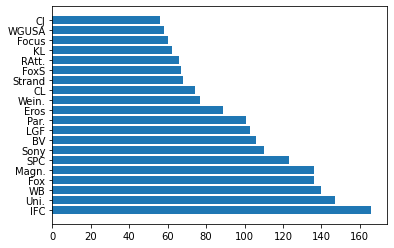

In [117]:
#How many movies each studio make

fig, ax = plt.subplots()

ax.barh(list(studio_counts.index), list(studio_counts.values))

plt.show()

In [ ]:
movie_basics_df